In [1]:
import numpy as np
from array import *
import matplotlib.pyplot as plt
import os
import time
import glob

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

In [2]:
# Specify the folder where the files are located
folder_path = '/home/leoperes/Dropbox/BoostedDM/Final_Analysis/UpperLimitCode/CLs/plots/final/'

# Use glob to find all files matching the pattern in the specified folder
pattern = os.path.join(folder_path, 'limits*.dat')

# Get all files matching the pattern
files = sorted(glob.glob(pattern))

# Move the first 4 files to the last place
if len(files) > 4:
    files = files[4:] + files[:4]

# Initialize a list of 5 empty lists, one for each line
limits = [[] for _ in range(5)]

# Read each file
for file in files:
    with open(file, 'r') as f:
        # Read each line and store it in the appropriate list
        for i, line in enumerate(f.readlines()):
            number = float(line.strip())  # Convert the line to an integer
            limits[i].append(number)  # Add the number to the appropriate list


In [3]:
# Print each list of numbers
for i, values in enumerate(limits, start=1):
    print(f"Numbers from line {i} across all files: {values}")

Numbers from line 1 across all files: [1.1132132132132132e-06, 1.4324324324324323e-06, 2.1441441441441442e-06, 3.5285285285285286e-06, 1.7027027027027024e-07, 2.4894894894894897e-07, 3.931931931931932e-07, 7.702702702702702e-07, 9.281281281281282e-08, 1.7057057057057058e-07, 2.6166166166166166e-07, 6.531531531531531e-07]
Numbers from line 2 across all files: [3.0889889889889887e-06, 3.6936936936936935e-06, 5.423423423423423e-06, 9.1001001001001e-06, 3.918918918918919e-07, 5.804804804804805e-07, 9.128128128128129e-07, 1.731231231231231e-06, 2.1591591591591589e-07, 3.9429429429429427e-07, 6.078078078078079e-07, 1.5045045045045042e-06]
Numbers from line 3 across all files: [3.295095095095095e-06, 4.027027027027027e-06, 5.855855855855855e-06, 1.0047047047047047e-05, 4.36036036036036e-07, 6.453453453453454e-07, 1.0115115115115117e-06, 1.9189189189189187e-06, 2.382982982982983e-07, 4.370870870870871e-07, 6.743743743743744e-07, 1.662162162162162e-06]
Numbers from line 4 across all files: [5.2

In [4]:
limits

[[1.1132132132132132e-06,
  1.4324324324324323e-06,
  2.1441441441441442e-06,
  3.5285285285285286e-06,
  1.7027027027027024e-07,
  2.4894894894894897e-07,
  3.931931931931932e-07,
  7.702702702702702e-07,
  9.281281281281282e-08,
  1.7057057057057058e-07,
  2.6166166166166166e-07,
  6.531531531531531e-07],
 [3.0889889889889887e-06,
  3.6936936936936935e-06,
  5.423423423423423e-06,
  9.1001001001001e-06,
  3.918918918918919e-07,
  5.804804804804805e-07,
  9.128128128128129e-07,
  1.731231231231231e-06,
  2.1591591591591589e-07,
  3.9429429429429427e-07,
  6.078078078078079e-07,
  1.5045045045045042e-06],
 [3.295095095095095e-06,
  4.027027027027027e-06,
  5.855855855855855e-06,
  1.0047047047047047e-05,
  4.36036036036036e-07,
  6.453453453453454e-07,
  1.0115115115115117e-06,
  1.9189189189189187e-06,
  2.382982982982983e-07,
  4.370870870870871e-07,
  6.743743743743744e-07,
  1.662162162162162e-06],
 [5.285085085085085e-06,
  6.288288288288288e-06,
  9.00900900900901e-06,
  1.592692

In [5]:

# lighter DM mass
MB = np.array([5,10,20,40])
# gamma
gam = np.array([1.1, 1.5, 10])
# Heavy DM mass = Lighter DM mass * gamma
MA = np.reshape(np.multiply.outer(gam,MB),12)

PhenPaperSensitivity = [6.12877527e-07, 8.28514808e-07, 1.23738536e-06, 2.19586539e-06, 2.75543123e-07, 3.90073889e-07, 6.29320177e-07, 1.21236806e-06, 1.54204697e-07, 2.72382985e-07, 4.46945198e-07, 1.04557268e-06]

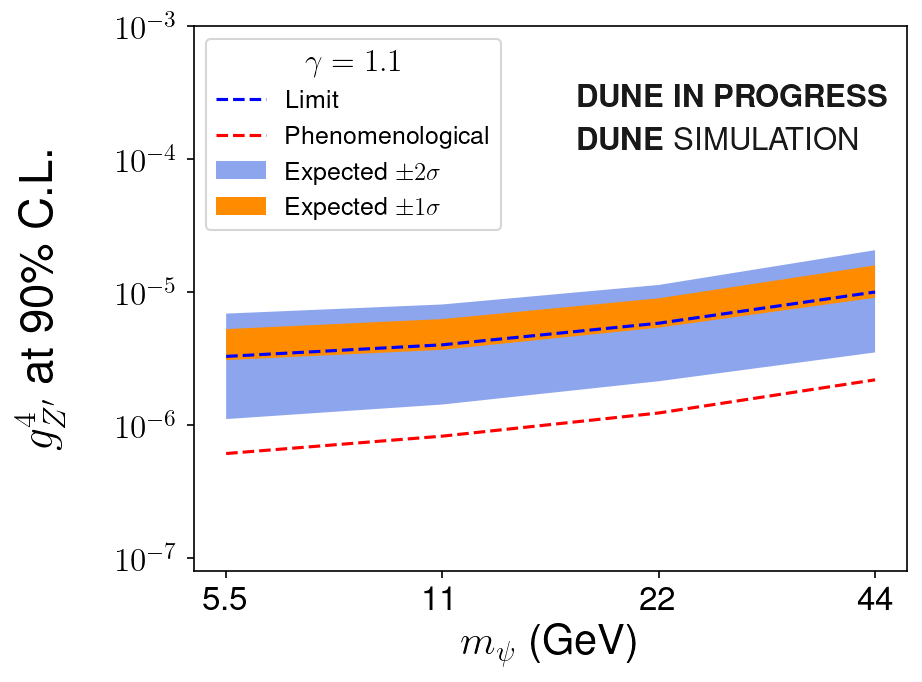

In [9]:

################################################################
#                 PLOT FIGURE          gamma = 1.1             #
################################################################

fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111)

plt.rc('text', usetex=True)
plt.rc('font', size=15)


ax1.plot(MA[0:4],limits[2][0:4], '--', label='Limit',color='blue')
ax1.plot(MA[0:4],PhenPaperSensitivity[0:4], '--', label='Phenomenological',color='red')

plt.fill_between(MA[0:4], limits[0][0:4], limits[4][0:4], color='royalblue', alpha=0.6,label = r' Expected $\pm 2 \sigma$', ec=None)
plt.fill_between(MA[0:4], limits[1][0:4], limits[3][0:4], color='darkorange', alpha=1.,label = r' Expected $\pm 1 \sigma$', ec=None)

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.set_xticks(MA[0:4])
ax1.set_xticklabels(['5.5','11','22','44'])
ax1.set_xlabel(r'$m_\psi$ (GeV)', fontsize=20)
ax1.set_ylabel(r'$g_{Z^\prime}^4$ at 90\% C.L.',rotation=90, fontsize=22,labelpad=25)
ax1.set_ylim(8e-8, 1e-3)
minx,maxx = ax1.get_xlim()
plt.tick_params(axis='both', which='major', labelsize=16)

ax1.minorticks_off()
plt.text(17,2.5e-4,r'\textbf{DUNE IN PROGRESS}', alpha=0.9)
plt.text(17,1.2e-4,r'\textbf{DUNE}  SIMULATION', alpha=0.9)
ax1.legend(title=r'$\gamma=1.1$',fontsize = 12, frameon=True, loc= 'upper left')
plt.tight_layout()
plt.savefig('Last_Sensit_b1p1'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf', dpi=600)
plt.show()

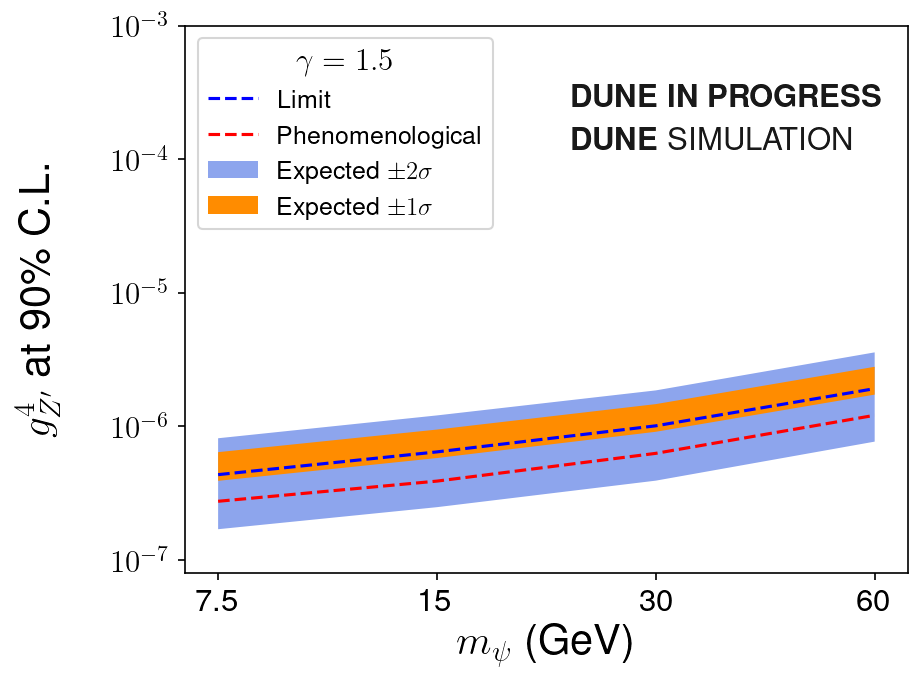

In [10]:

################################################################
#                 PLOT FIGURE          gamma = 1.5             #
################################################################

fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111)

plt.rc('text', usetex=True)
plt.rc('font', size=15)


ax1.plot(MA[4:8],limits[2][4:8], '--', label='Limit',color='blue')
ax1.plot(MA[4:8],PhenPaperSensitivity[4:8], '--', label='Phenomenological',color='red')

plt.fill_between(MA[4:8], limits[0][4:8], limits[4][4:8], color='royalblue', alpha=0.6,label = r' Expected $\pm 2 \sigma$', ec=None)
plt.fill_between(MA[4:8], limits[1][4:8], limits[3][4:8], color='darkorange', alpha=1.,label = r' Expected $\pm 1 \sigma$', ec=None)

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.set_xticks(MA[4:8])
ax1.set_xticklabels(['7.5','15','30','60'])
ax1.set_xlabel(r'$m_\psi$ (GeV)', fontsize=20)
ax1.set_ylabel(r'$g_{Z^\prime}^4$ at 90\% C.L.',rotation=90, fontsize=20,labelpad=25)
ax1.set_ylim(8e-8, 1e-3)
minx,maxx = ax1.get_xlim()

ax1.minorticks_off()
ax1.legend(title=r'$\gamma=1.5$',fontsize = 12, frameon=True, loc= 'upper left')
plt.text(23,2.5e-4,r'\textbf{DUNE IN PROGRESS}', alpha=0.9)
plt.text(23,1.2e-4,r'\textbf{DUNE}  SIMULATION', alpha=0.9)
plt.tight_layout()
plt.savefig('Last_Sensit_b1p5'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf', dpi=600)
plt.show()

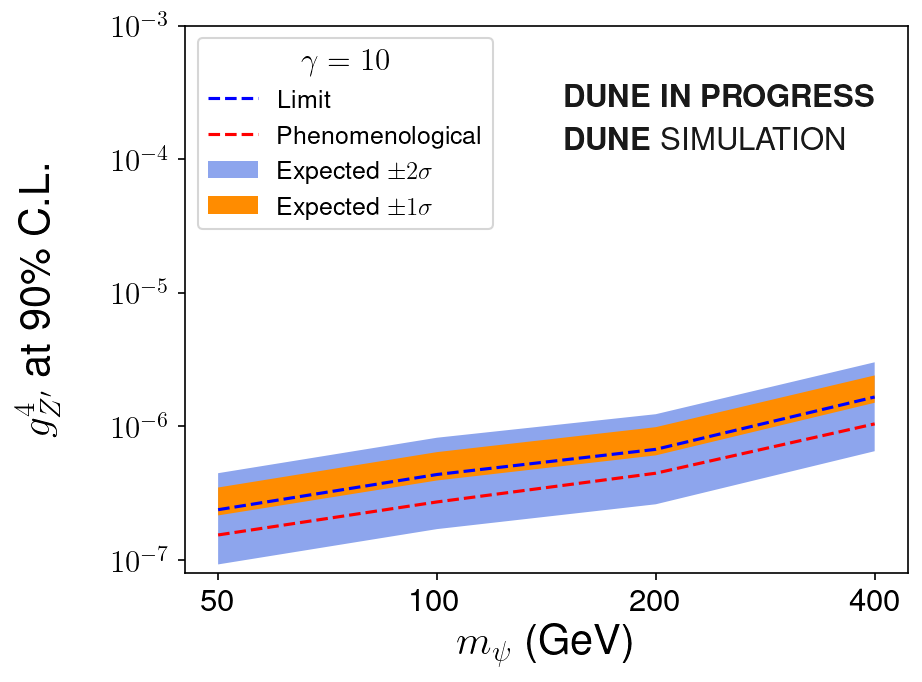

In [11]:
################################################################
#                 PLOT FIGURE          gamma = 10              #
################################################################

fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111)

plt.rc('text', usetex=True)
plt.rc('font', size=15)


ax1.plot(MA[8:12],limits[2][8:12], '--', label='Limit',color='blue')
ax1.plot(MA[8:12],PhenPaperSensitivity[8:12], '--', label='Phenomenological',color='red')

plt.fill_between(MA[8:12], limits[0][8:12], limits[4][8:12], color='royalblue', alpha=0.6,label = r' Expected $\pm 2 \sigma$', ec=None)
plt.fill_between(MA[8:12], limits[1][8:12], limits[3][8:12], color='darkorange', alpha=1.,label = r' Expected $\pm 1 \sigma$', ec=None)

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.set_xticks(MA[8:12])
ax1.set_xticklabels(['50','100','200','400'])
ax1.set_xlabel(r'$m_\psi$ (GeV)', fontsize=20)
ax1.set_ylabel(r'$g_{Z^\prime}^4$ at 90\% C.L.',rotation=90, fontsize=20,labelpad=25)
ax1.set_ylim(8e-8, 1e-3)
ax1.set_yscale('log')
minx,maxx = ax1.get_xlim()

ax1.minorticks_off()
ax1.legend(title=r'$\gamma=10$',fontsize = 12, frameon=True, loc= 'upper left')
plt.text(150,2.5e-4,r'\textbf{DUNE IN PROGRESS}', alpha=0.9)
plt.text(150,1.2e-4,r'\textbf{DUNE}  SIMULATION', alpha=0.9)
plt.tight_layout()
plt.savefig('Last_Sensit_b10'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf', dpi=600)
plt.show()